In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
budget_df = pd.read_csv('../datasets/other/budget.csv')
budget_df.head()

,Date,ValueDate,Description,Transaction,balance,Asmhta,Fee,Channel
0,2023-05-27,2023-05-25,דלק מנטה מבואו בכרטיס 4329י,-22.80,164196.45,0 203,NaN,NaN
1,2023-05-25,2023-05-25,מיסטר מרקט בכרטיס 4329י,-158.60,164219.25,0 203,NaN,NaN
2,2023-05-25,2023-05-25,אטליז שיתי זאה בכרטיס 4329י,-360.00,164377.85,0 203,NaN,NaN
3,2023-05-25,2023-05-25,פרי וירק סלאח בכרטיס 4329י,-102.00,164737.85,0 203,NaN,NaN
4,2023-05-24,2023-05-24,מיסטר מרקט בכרטיס 4329י,-91.18,164839.85,0 203,NaN,NaN


In [156]:
class ColumnNames:
    DATE = 'Date'
    VALUE_DATE = 'ValueDate'
    BALLANCE = 'balance'
    TRANSACTION = 'Transaction'

In [157]:
budget_df[ColumnNames.DATE] = pd.to_datetime(budget_df[ColumnNames.DATE], format='%Y-%m-%d')
budget_df[ColumnNames.VALUE_DATE] = pd.to_datetime(budget_df[ColumnNames.VALUE_DATE], format='%Y-%m-%d')

In [158]:
budget_df.dtypes

Date           datetime64[ns]
ValueDate      datetime64[ns]
Description            object
Transaction           float64
balance               float64
Asmhta                 object
Fee                    object
Channel                object
dtype: object

In [159]:
budget_df \
    .sort_values(by=[ColumnNames.DATE]) \
    .head()

,Date,ValueDate,Description,Transaction,balance,Asmhta,Fee,Channel
268,2022-06-01,2022-05-31,עמלת סמס חבילה בסיסית,-11.00,146206.74,5310 106,NaN,סניף
265,2022-06-02,2022-06-02,משיכת שיק:0080000159,-1670.00,144517.59,5313,ערוץ ישיר,יזום מחשב
267,2022-06-02,2022-06-02,חיוב לכרטיס ויזה 4329,-9.90,146196.84,5311,NaN,סניף
266,2022-06-02,2022-05-31,"עמלת פעולה בערוץ ישיר-מט""י, לפי 5 יח'",-9.25,146187.59,5312 106,NaN,סניף
264,2022-06-03,2022-06-03,חיוב לכרטיס ויזה 4329,-87.30,144430.29,5314,NaN,סניף


In [160]:
transaction_by_date = budget_df \
    .groupby(by=[ColumnNames.DATE])[ColumnNames.TRANSACTION] \
    .sum() \
    .sort_index()

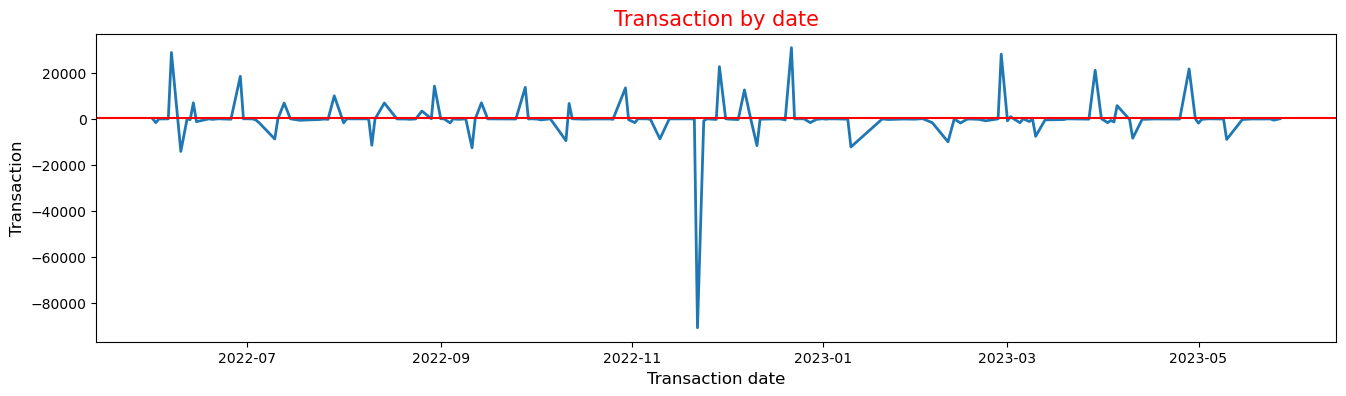

In [161]:
x_value = transaction_by_date.index.values
y_value = transaction_by_date.values

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_value, y_value, linewidth=2);
ax.set_title('Transaction by date', fontsize=15, color='red')
ax.set_xlabel('Transaction date', fontsize=12)
ax.set_ylabel('Transaction', fontsize=12)
ax.axhline(y=y_value.mean(), color='red')

In [162]:
transaction_mean = budget_df[ColumnNames.TRANSACTION].mean()
transaction_count = len(budget_df)
print(f'{transaction_count} transactions were recorded. Transaction amount mean is: {transaction_mean}')
print(f'Yearly savings equals to {transaction_count*transaction_mean}')

269 transactions were recorded. Transaction amount mean is: 66.83535315985127
Yearly savings equals to 17978.709999999992


In [163]:
ballance_by_date = budget_df \
    .groupby(by=[ColumnNames.DATE])[ColumnNames.BALLANCE] \
    .max() \
    .sort_index()

Text(0, 0.5, 'Ballance')

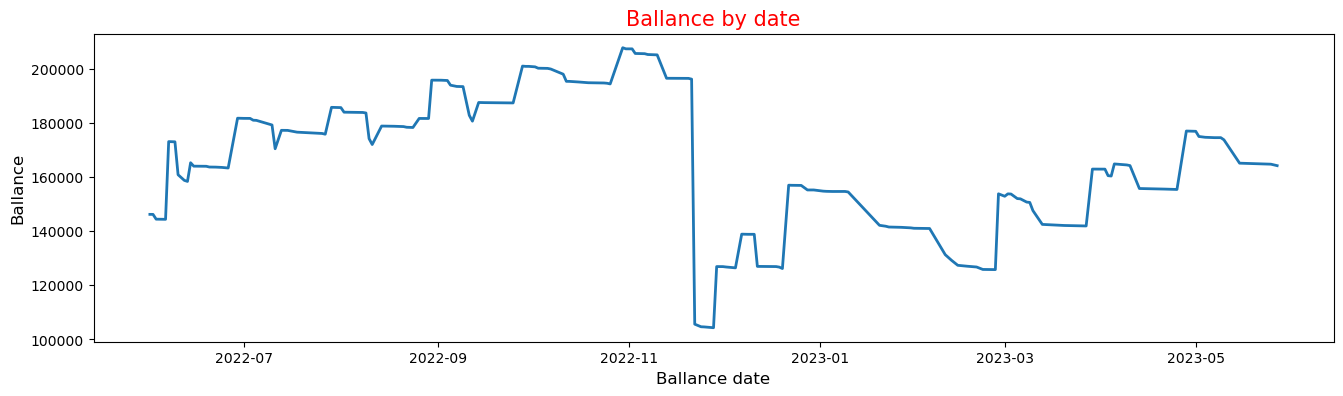

In [164]:
x_value = ballance_by_date.index.values
y_value = ballance_by_date.values

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_value, y_value, linewidth=2);
ax.set_title('Ballance by date', fontsize=15, color='red')
ax.set_xlabel('Ballance date', fontsize=12)
ax.set_ylabel('Ballance', fontsize=12)
#ax.axhline(y=y_value.mean(), color='red')

In [165]:
first_balance = budget_df \
    .sort_values(by=[ColumnNames.DATE]) \
    .head(1)[ColumnNames.BALLANCE] \
    .values[0]

savings = budget_df[ColumnNames.TRANSACTION].sum()
car_cast = budget_df[ColumnNames.TRANSACTION].min()
pikadon = 24000

In [166]:
yearly_savings = savings + pikadon + (-1)*car_cast
print(f'Yearly savings are: {yearly_savings}') 

Yearly savings are: 132478.71


In [167]:
monthly_savings = overall_savings /12
print(f'Monthly savings are: {monthly_savings}')

Monthly savings are: 11039.8925
